# Préambule
Notebook d'introduction au projet 8 "Déployez un modèle dans le Cloud". Ce notebook vise à explorer le jeu de données pour y mettre en avant quelques insights.

# Librairies

In [2]:
import os
from PIL import Image
import pandas as pd
import numpy as np
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

# Config

In [3]:
colors = ['#494949', '#477797', '#77c6fc', '#bbe3fe', '#ddf1fe']
sns.set_style("darkgrid")
palette = sns.color_palette(colors)

# Import data

In [4]:
data = list()
STORAGE_PATH = '../data/fruits-360-original-size/'
counter = 0
for root, dirs, files in tqdm(os.walk(STORAGE_PATH)):
    for file in files:
        if file.endswith('.jpg'):
            
            path = os.path.join(root, file)
            label = root.split('/')[-1].split('_')[0]
            dataset = root.split('/')[-2].lower()
            
            shape = np.array(Image.open(path)).shape
            resolution = shape[0] * shape[1]
            
            row = [dataset, label, path, resolution]
            data.append(row)

101it [01:39,  1.02it/s]


In [5]:
data = pd.DataFrame(data, columns=['dataset', 'label', 'path', 'resolution'])

# EDA

## Resolutions

In [6]:
data.resolution.describe()

count     12455.000000
mean     249998.425130
std      163306.431074
min       63100.000000
25%      162310.000000
50%      197918.000000
75%      295935.000000
max      803656.000000
Name: resolution, dtype: float64

Text(0.5, 1.0, 'Resolution distribution')

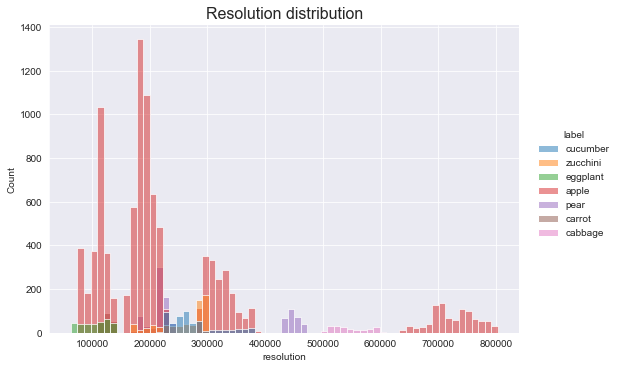

In [7]:
sns.displot(x='resolution', hue='label', data=data, height=5, aspect=1.5)
plt.title('Resolution distribution', size = 16)

## Label distribution

<Figure size 864x720 with 0 Axes>

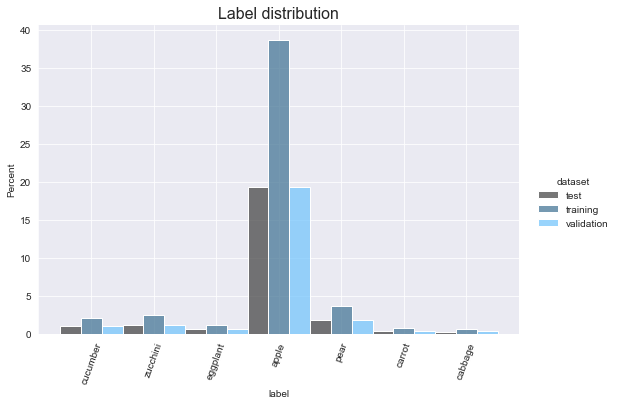

In [66]:
sns.displot(x = 'label', hue='dataset', multiple='dodge', data = data, 
            palette = sns.color_palette(colors, n_colors=3), stat='percent', height=5, aspect=1.5)
plt.title('Label distribution', size = 16)
plt.xticks(rotation=70)

## Images

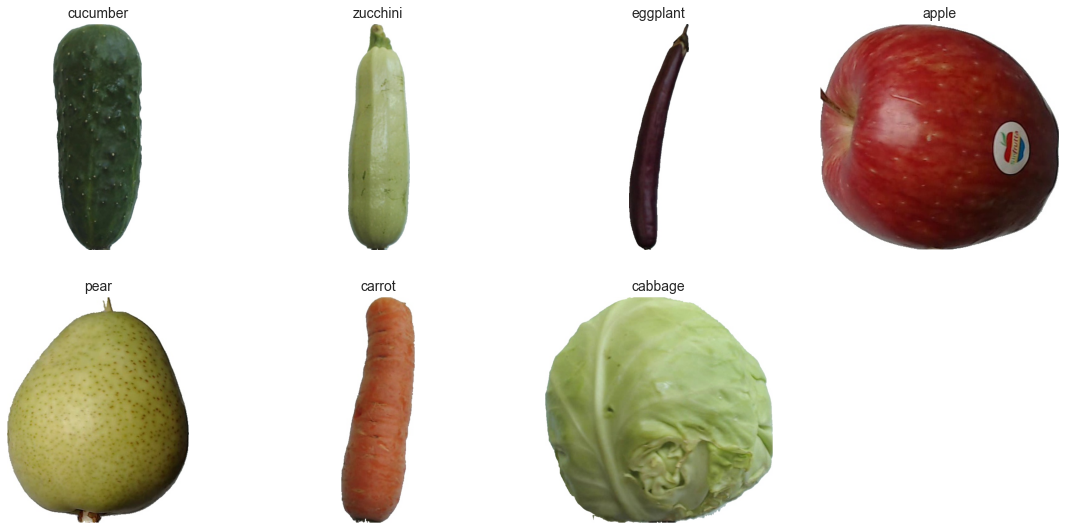

In [8]:
plt.figure(figsize=(16, 8))
for i, label in enumerate(data.label.unique()):
    plt.subplot(2, 4, i+1)
    plt.title(label, size=14)
    path = data.loc[data.label == label, "path"].sample(1).iloc[0]
    plt.imshow(Image.open(path))
    plt.axis('off')
plt.tight_layout(pad=3)
plt.show()